## DBSCAN (Density-Based Scanning)

DBSCAN is an unsupervised machine learning algorithm that groups simliar datapoints via clusters. Intrestingly, this algorithm does not define an amount of clusters to start as explained in the following:

The algorithm works by calculating the core points, which are points that contain atleast n neighbors that are eps distance away. For each unvisited core point, a cluster is placed. If a cluster contains another core point, the cluster is expanded by including all neighbors of the core point. This process is done when no clusters expand. NOTE: a border point, which marks the edge of a cluster, is defined as a point that is within eps distance away from core point but has less than n neighbors.

In [165]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_moons
from matplotlib import pyplot as plt

In [ ]:
class CorePoint:

    def __init__(self, point, neighbors):
        
        self.point = point
        self.neighbors = neighbors
    


class DBSCAN:

    def __init__(self, eps, min_neighbors):
        
        self.eps = eps
        self.min_neighbors = min_neighbors
        self.clusters = []
    
    def get_neighbors(self, point, data):

        neighbors = []

        for cand in data:

            if not np.array_equal(cand, point) and np.sum((point - cand)**2)**(1/2) <= self.eps:

                neighbors.append(cand)
        
        return np.array(neighbors)
    
    def fit(self, data):

        core_points = [
            CorePoint(point, self.get_neighbors(point, data)) for point in data if self.get_neighbors(point, data).shape[0] >= self.min_neighbors
        ]

        self.clusters = [[]]

        while core_points:

            cp = core_points.pop()

            if self.clusters == [[]]:

                self.clusters = [[cp]]
            
            else:
                
                found = False
                cls_idx = -1

                while not found and cls_idx < len(self.clusters)-1:

                    cls_idx += 1

                    for cand in self.clusters[cls_idx]:

                        if np.any([np.array_equal(neighbor, cp.point) for neighbor in cand.neighbors]):

                            self.clusters[cls_idx].append(cp)

                            found = True
                            break

                if not found:

                    self.clusters.append([cp])
                
                



In [167]:
points, c = make_moons(100, noise=0.1)

points

array([[ 1.08424816e+00, -3.52956377e-02],
       [ 5.88908858e-02,  9.04747534e-01],
       [ 1.92492942e+00, -6.54065875e-02],
       [-9.01599793e-01,  5.23422471e-01],
       [ 1.99531407e+00,  4.32291874e-01],
       [-5.12423625e-01,  7.46016721e-01],
       [ 1.32143231e+00, -4.85825289e-01],
       [ 1.20798477e+00, -3.88856926e-01],
       [ 2.09120666e+00,  3.52864122e-01],
       [ 9.65051299e-01, -4.29861668e-01],
       [ 7.68873169e-01,  5.34921713e-01],
       [ 2.08877069e+00,  6.36031702e-01],
       [-2.59919426e-01,  9.67047865e-01],
       [ 5.37149182e-01, -1.72039861e-01],
       [-1.04108148e-02,  1.10634130e+00],
       [ 7.65662948e-01,  9.56409057e-01],
       [-6.89056626e-02,  3.78694575e-01],
       [ 9.59404462e-01, -6.60660163e-01],
       [ 2.10762764e+00,  3.32529791e-01],
       [ 8.11158300e-02,  9.63702096e-01],
       [ 9.98521259e-01,  1.32740613e-01],
       [-9.93588998e-01,  5.07706249e-01],
       [ 7.38163529e-02,  3.25130489e-01],
       [ 1.

Clusters [[<__main__.CorePoint object at 0x0000020988C93590>, <__main__.CorePoint object at 0x0000020988BBB010>, <__main__.CorePoint object at 0x0000020988ACD8D0>, <__main__.CorePoint object at 0x0000020988ACDC50>, <__main__.CorePoint object at 0x0000020988ACFC10>, <__main__.CorePoint object at 0x0000020988ACD010>, <__main__.CorePoint object at 0x000002098873F710>, <__main__.CorePoint object at 0x0000020988AD8DD0>, <__main__.CorePoint object at 0x00000209889757D0>, <__main__.CorePoint object at 0x0000020988975650>, <__main__.CorePoint object at 0x0000020988977C90>, <__main__.CorePoint object at 0x0000020988977E10>, <__main__.CorePoint object at 0x0000020988611790>, <__main__.CorePoint object at 0x000002098847C150>, <__main__.CorePoint object at 0x000002098847E350>, <__main__.CorePoint object at 0x0000020983DDFF50>, <__main__.CorePoint object at 0x0000020983DDEFD0>, <__main__.CorePoint object at 0x0000020983DDDC50>, <__main__.CorePoint object at 0x0000020983DDF0D0>, <__main__.CorePoint 

C:\Users\frank\AppData\Local\Temp\ipykernel_5980\2970597122.py:18: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(pts_to_color[:, 0], pts_to_color[:, 1], c=color)


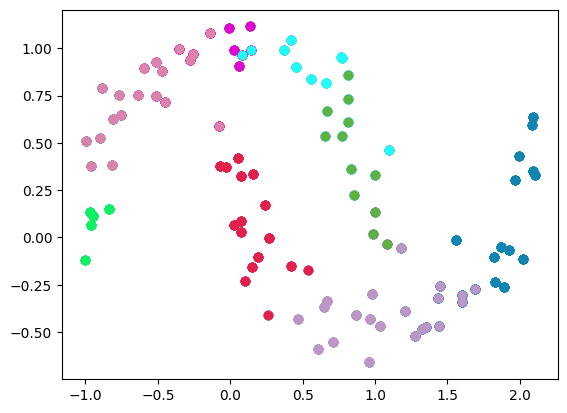

In [168]:
dbscan = DBSCAN(0.5, 2)
dbscan.fit(points)
print("Clusters", dbscan.clusters)

plt.scatter(points[:, 0], points[:, 1], c="black")

for cluster in dbscan.clusters:

    color = (np.random.random(1)[0], np.random.random(1)[0], np.random.random(1)[0])
    pts_to_color = []

    for core in cluster:

        pts_to_color.extend(core.neighbors)

    pts_to_color = np.array(pts_to_color)

    plt.scatter(pts_to_color[:, 0], pts_to_color[:, 1], c=color)